In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Cyclist Dataset

In [2]:
cyclists_df = pd.read_csv('../dataset/cyclists_outlier.csv')

First of all, we create a numerical dataset excluding the categorical ones from the original cleaned and engineered dataset.

In [3]:
columns_to_keep = ["performance_entropy", "relative_position_std", "mean_last_20_positions", 
                   "career_level", "avg_relative_position", "avg_position_vs_startlist"]

numeric_dataset = cyclists_df[columns_to_keep].select_dtypes(include=['float64', 'int64'])

numeric_dataset.head()

,performance_entropy,relative_position_std,mean_last_20_positions,career_level,avg_relative_position,avg_position_vs_startlist
0,5.163582,39.201929,75.891331,64.738139,51.614142,4.713922
1,3.503989,59.859310,71.644204,30.902502,58.714952,9.919404
2,4.883103,38.022477,68.255834,50.406473,55.648467,8.147075
3,3.674829,21.324727,38.177249,34.859657,28.962189,5.795795
4,5.729529,36.052769,71.199058,29.844554,47.090336,7.687096


In [4]:
scaler = StandardScaler()
scaler.fit(numeric_dataset)
X = scaler.transform(numeric_dataset)

### PCA

We do the PCA analysis to visualize in 2D the distribution of our multi-dimensional data.

TODO: add catrgories labels in the plots

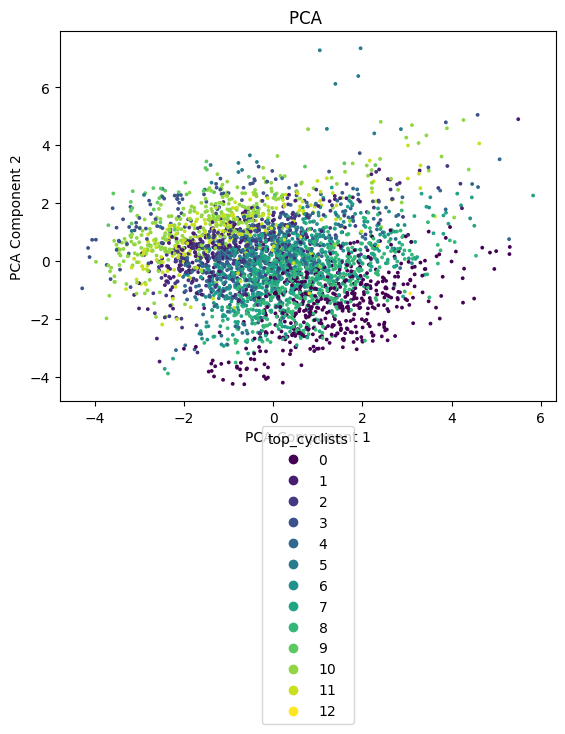

In [5]:
label_encoder = LabelEncoder()
continent_labels = label_encoder.fit_transform(cyclists_df['top_cyclists'])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=continent_labels, s=3)
legend = plt.legend(*scatter.legend_elements(), title="top_cyclists", loc='upper center', bbox_to_anchor=(0.5, -0.05))

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA ')
plt.show()

In [6]:
label_encoder = LabelEncoder()
continent_labels = label_encoder.fit_transform(cyclists_df['categorical_height'])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

scartter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=continent_labels, s=1)
legend = plt.legend(*scatter.legend_elements(), title="Height")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Cyclists Data')
plt.show()


KeyError: 'categorical_height'

In [ ]:

label_encoder = LabelEncoder()
continent_labels = label_encoder.fit_transform(cyclists_df['continent'])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=continent_labels, s=1)
legend = plt.legend(*scatter.legend_elements(), title="Continent")

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA ')
plt.show()

Saving the normalized cyclists dataset (only with numerical columns).

In [ ]:
"""normalized_df = pd.DataFrame(X, columns=cyclists_numerical_cols)
normalized_df.to_csv('../dataset/normalized_cyclists_dataset.csv', index=False)"""

---

---

## Races Dataset

In [ ]:
races_df = pd.read_csv('../dataset/races_outlier.csv')

First of all, we create a numerical dataset excluding the categorical ones from the original cleaned and engineered dataset.

In [ ]:
races_complexity_cluster_col = ["climb_total", "avg_cyclists_level", "duration_to_length"]

numeric_dataset = races_df[races_complexity_cluster_col].select_dtypes(include=['float64', 'int64'])

numeric_dataset.head()

,climb_total,avg_cyclists_level,duration_to_length
0,3.300,-0.036133,2.5509
1,3.500,0.133930,2.6168
2,3.495,0.101016,2.5587
3,3.558,0.263208,2.5311
4,3.320,0.206134,2.5335


In [ ]:
scaler = StandardScaler()
scaler.fit(numeric_dataset)
X = scaler.transform(numeric_dataset)

### PCA

We do the PCA analysis to visualize in 2D the distribution of our multi-dimensional data.

TODO: add catrgories labels in the plots

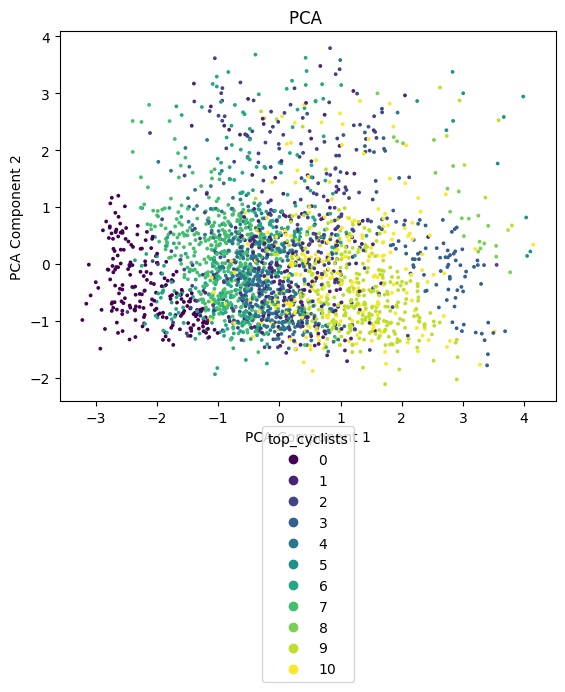

In [ ]:
label_encoder = LabelEncoder()
continent_labels = label_encoder.fit_transform(races_df['top_complex_races_2'])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=continent_labels, s=3)
legend = plt.legend(*scatter.legend_elements(), title="top_cyclists", loc='upper center', bbox_to_anchor=(0.5, -0.05))

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA ')
plt.show()